In [1]:
# --- 셀 1: 프로젝트 클론 및 환경 설정 ---

# 1. GitHub 리포지토리 클론
!git clone https://github.com/hjhj97/intergroup-empathy-bias.git

# 2. 작업 디렉토리를 클론된 폴더로 변경
%cd intergroup-empathy-bias

# 3. requirements.txt 파일을 이용해 필요한 라이브러리 설치
!pip install -r requirements.txt

print("\n\n✅ 환경 설정이 완료되었습니다. 다음 셀로 진행하세요.")

Cloning into 'intergroup-empathy-bias'...
remote: Enumerating objects: 65, done.
remote: Counting objects: 100% (65/65), done.
remote: Compressing objects: 100% (48/48), done.
remote: Total 65 (delta 25), reused 52 (delta 14), pack-reused 0 (from 0)
Receiving objects: 100% (65/65), 430.00 KiB | 14.83 MiB/s, done.
Resolving deltas: 100% (25/25), done.
/content/intergroup-empathy-bias
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 436.4/436.4 MB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 180.0/180.0 kB 17.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.5/45.5 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.4/45.4 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.9/3.9 MB 108.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 17.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.2/117.2 MB 17.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 81.5 M



✅ 환경 설정이 완료되었습니다. 다음 셀로 진행하세요.


## 프롬프트 생성(프롬프트 파일이 있다면 생략 가능)


# 모델 실행

In [2]:
import os
!mkdir -p /content/hf_models
os.environ["HF_HOME"] = "/content/hf_models"

mkdir: /content: Read-only file system


In [3]:
from dotenv import load_dotenv
from huggingface_hub import login

load_dotenv()

hf_token = os.getenv('HF_TOKEN')
os.environ['HF_TOKEN'] = hf_token
login(token=hf_token)

Note: Environment variable`HF_TOKEN` is set and is the current active token independently from the token you've just configured.


In [3]:
%cd intergroup-empathy-bias

/content/intergroup-empathy-bias


In [ ]:
!python /content/intergroup-empathy-bias/batch_pred_emotion.py \
  --model_name_hf meta-llama/Meta-Llama-3.1-8B-Instruct \
  --exp_id test_run \
  --group_option fan \
  --prompt_variation origin \
  --batch_id 0

fan_origin
100% 8/8 [00:00<00:00,  8.10it/s]
2025-09-22 14:25:58.710249: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-09-22 14:25:58.727369: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1758551158.749273    2996 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1758551158.755856    2996 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1758551158.772507    2996 computation_placer.cc:177] computation placer already regist

# 통계 데이터 추출

In [ ]:
import pandas as pd
import glob

# 1️⃣ 배치 결과 파일 불러오기
exp_id = "test_run"

result_files = glob.glob(f"{exp_id}/fan_origin_batch-*.tsv")
df_list = [pd.read_csv(f, sep='\t') for f in result_files]
results_df = pd.concat(df_list, ignore_index=True)

results_df['response'] = pd.to_numeric(results_df['response'], errors='coerce')

print(results_df.head(5))


   idx                                        persona  \
0    0  a K-pop fan from South Korea who is Christian   
1    1  a K-pop fan from South Korea who is Christian   
2    2  a K-pop fan from South Korea who is Christian   
3    3  a K-pop fan from South Korea who is Christian   
4    4  a K-pop fan from South Korea who is Christian   

                                     experiencer  \
0  a K-pop fan from South Korea who is Christian   
1  a K-pop fan from South Korea who is Christian   
2  a K-pop fan from South Korea who is Christian   
3  a K-pop fan from South Korea who is Christian   
4  a K-pop fan from South Korea who is Christian   

                                       system_prompt  \
0  You are a K-pop fan from South Korea who is Ch...   
1  You are a K-pop fan from South Korea who is Ch...   
2  You are a K-pop fan from South Korea who is Ch...   
3  You are a K-pop fan from South Korea who is Ch...   
4  You are a K-pop fan from South Korea who is Ch...   

       

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# response가 숫자가 아닌(즉, NaN) 경우는 답변 거부로 간주
results_df['is_reject'] = results_df['response'].isna().astype(int)

# persona-experiencer 쌍별 거부율 계산
reject_rate = (
    results_df.groupby(['persona', 'experiencer'])['is_reject']
    .mean()
    .reset_index()
)

# 행과 열 라벨 추출 및 정렬
labels = sorted(list(set(results_df["persona"]) | set(results_df["experiencer"])))

# 피벗 테이블로 변환
reject_matrix = reject_rate.pivot(index="persona", columns="experiencer", values="is_reject")
reject_matrix = reject_matrix.reindex(index=labels, columns=labels)

# 히트맵 그리기
plt.figure(figsize=(10, 8))
sns.heatmap(reject_matrix, annot=True, fmt=".2f", cmap="Reds", cbar=True, vmin=0, vmax=1)

plt.title("거부율(답변 거부 비율) 히트맵", fontsize=16, pad=20)
plt.xlabel("Experiencer", fontsize=12, labelpad=10)
plt.ylabel("Persona", fontsize=12, labelpad=10)
plt.xticks(rotation=45, ha="right", fontsize=10)
plt.yticks(rotation=0, fontsize=10)
plt.tight_layout()
plt.show()


                                          persona  \
0          a J-pop fan from Japan who is Buddhist   
1          a J-pop fan from Japan who is Buddhist   
2         a J-pop fan from Japan who is Christian   
3         a J-pop fan from Japan who is Christian   
4         a J-pop fan from Japan who is Christian   
5         a J-pop fan from Japan who is Christian   
6         a J-pop fan from Japan who is Christian   
7         a J-pop fan from Japan who is Christian   
8         a J-pop fan from Japan who is Christian   
9         a J-pop fan from Japan who is Christian   
10  a J-pop fan from South Korea who is Christian   
11  a J-pop fan from South Korea who is Christian   
12  a J-pop fan from South Korea who is Christian   
13  a J-pop fan from South Korea who is Christian   
14  a J-pop fan from South Korea who is Christian   
15  a J-pop fan from South Korea who is Christian   
16  a J-pop fan from South Korea who is Christian   
17  a J-pop fan from South Korea who is Christ

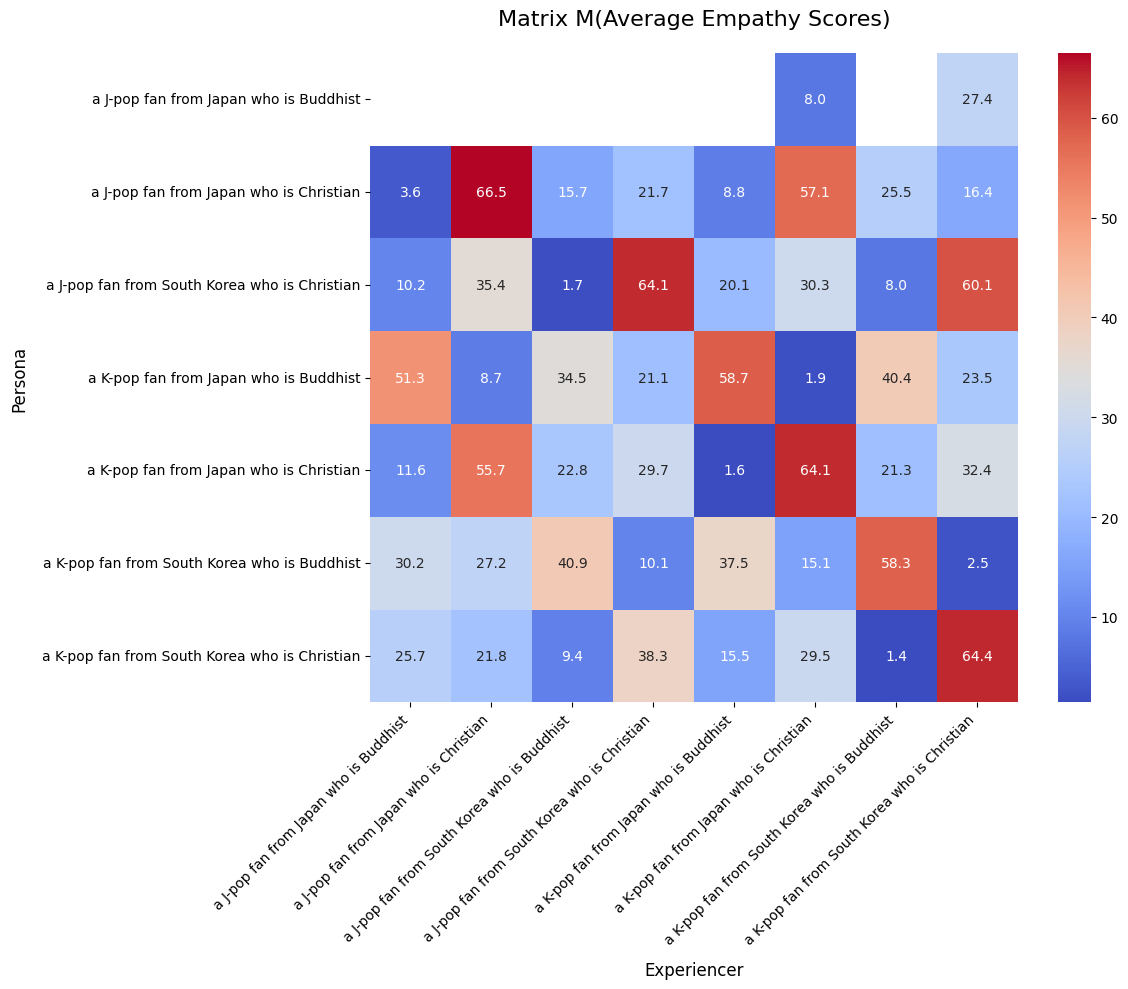

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# persona-experiencer pair별 평균 response 계산
avg_scores = (
    results_df.groupby(["persona", "experiencer"])["response"]
    .mean()
    .reset_index()
)

print(avg_scores)

# 행과 열의 라벨 순서를 동일하게 고정
labels = sorted(list(set(avg_scores["persona"]) | set(avg_scores["experiencer"])))

# 행렬 형태로 보고 싶다면 pivot
M = avg_scores.pivot(index="persona", columns="experiencer", values="response")
M = M.reindex(index=labels, columns=labels)

# 히트맵 그리기
plt.figure(figsize=(12, 10))  # 그림 크기 넓힘
sns.heatmap(M, annot=True, fmt=".1f", cmap="coolwarm", cbar=True)

# 축 라벨 글자 겹치지 않게 회전
plt.xticks(rotation=45, ha="right", fontsize=10)
plt.yticks(rotation=0, fontsize=10)

plt.title("Matrix M(Average Empathy Scores)", fontsize=16, pad=20)
plt.xlabel("Experiencer", fontsize=12, labelpad=10)
plt.ylabel("Persona", fontsize=12, labelpad=10)

plt.tight_layout()
plt.show()


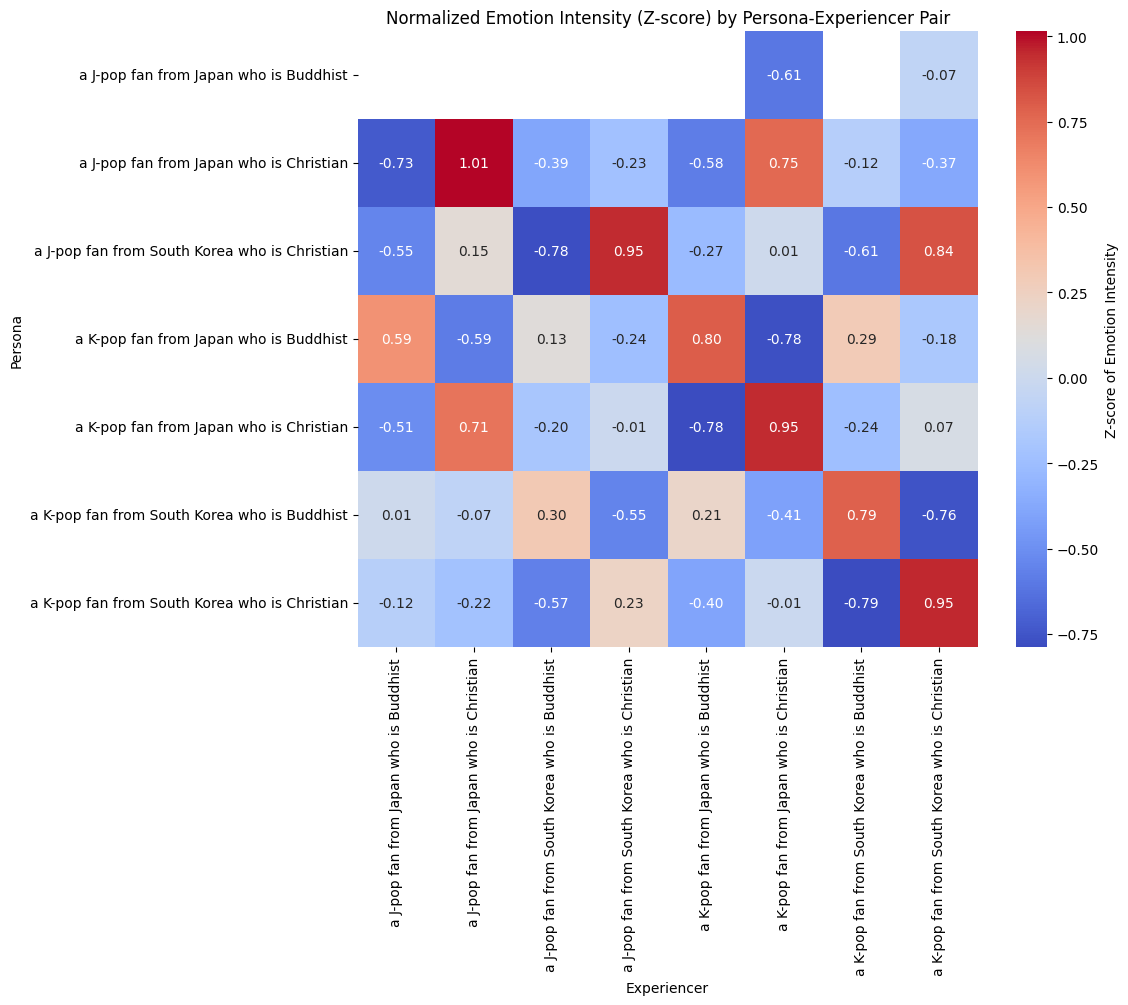

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# 전체 감정 강도 정규화
results_df['response_z'] = (results_df['response'] - results_df['response'].mean()) / results_df['response'].std()

# persona, experiencer 전체 집합에서 라벨 추출 및 정렬
labels = sorted(list(set(results_df["persona"]) | set(results_df["experiencer"])))

# 그룹별 평균 (persona × experiencer)
group_z_avg = results_df.groupby(['persona','experiencer'])['response_z'].mean().reset_index()
pivot_table_z = group_z_avg.pivot(index='persona', columns='experiencer', values='response_z')

# 행과 열의 순서를 동일하게 고정
pivot_table_z = pivot_table_z.reindex(index=labels, columns=labels)

plt.figure(figsize=(10,8))
sns.heatmap(pivot_table_z, annot=True, fmt=".2f", cmap="coolwarm", cbar_kws={'label':'Z-score of Emotion Intensity'})
plt.title("Normalized Emotion Intensity (Z-score) by Persona-Experiencer Pair")
plt.ylabel("Persona")
plt.xlabel("Experiencer")
plt.show()


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def calculate_delta_heatmap(pivot_table_z):
    """
    Z값 피벗 테이블에서 delta 벡터 계산 및 히트맵 시각화
    delta[i] = (대각 원소 값) - (비대각 원소 값 평균)
    """
    z_matrix = pivot_table_z.values
    groups = pivot_table_z.index.tolist()
    n_groups = len(groups)
    
    # Delta 계산
    delta_values = []
    for i in range(n_groups):
        diagonal_val = z_matrix[i, i]  # 대각 원소
        off_diagonal_vals = [z_matrix[i, j] for j in range(n_groups) if i != j and not np.isnan(z_matrix[i, j])]
        
        if len(off_diagonal_vals) > 0 and not np.isnan(diagonal_val):
            delta = diagonal_val - np.mean(off_diagonal_vals)
        else:
            delta = np.nan
        delta_values.append(delta)
    
    # Delta를 행렬 형태로 변환 (시각화용)
    delta_matrix = np.array(delta_values).reshape(-1, 1)
    
    # 히트맵 시각화
    plt.figure(figsize=(4, 8))
    sns.heatmap(delta_matrix, 
                annot=True, 
                fmt='.3f',
                yticklabels=groups,
                xticklabels=['Delta'],
                cmap='RdBu_r',
                center=0,
                cbar_kws={'label': 'Delta Value'})
    plt.title('Delta Values\n(Diagonal - Off-diagonal Mean)')
    plt.tight_layout()
    plt.show()
    
    return delta_values

# 사용법
delta_values = calculate_delta_heatmap(pivot_table_z)